In [414]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
get_ipython().magic(u'matplotlib inline') 
get_ipython().magic(u"config InlineBackend.figure_format='retina'")

## Contexto

* En nuestro sistema tenemos dos tablas, un ejemplo de estas tablas se encuentran en formato csv. Las tablas son visits y articles. En la tabla articles, cada fila representa un artículo de un proyecto construido en algún lugar del mundo. En las columnas tenemos token (representa al id del artículo), year (el año que se construyó el proyecto), country_name (el país donde el proyecto fue construído). Puedes revisar los artículos en https://www.archdaily.com/


* En la tabla visits, cada fila representa una visita a un artículo. En las columnas tenemos page_path y query_string que son la url que vio el visitante. visit_country muestra la país de origen del visitante.


## Tarea

1.- Construye un programa en Python, que muestre los 10 proyectos más visitados. 

2.- Agrega al programa anterior la posibilidad de filtrar por país del visitante. 

3.- Construye consultan en SQL, que respondan las preguntas 1. y 2. 

4.- ¿Qué otra información consideras relevante que puedas obtener a partir de estos datos?


### Carga de datos

* cargamos la tabla visits y articles

In [305]:
df_visits = pd.read_csv('test_visits.csv',encoding='utf-8',sep=',')
df_articles = pd.read_csv('test_articles.csv',encoding='utf-8',sep=',')

In [3]:
df_visits

,page_path,query_string,visit_country
0,/13093/body-house-monolab,NaN,NaN
1,/13093/body-house-monolab,NaN,NaN
2,/17962/turtagro-hotel-jva,NaN,NaN
3,/1929/mortensrud-church-jsa,NaN,NaN
4,/1929/mortensrud-church-jsa,NaN,NaN
5,/1929/mortensrud-church-jsa,NaN,NaN
6,/1929/mortensrud-church-jsa,NaN,NaN
7,/1929/mortensrud-church-jsa,NaN,NaN
8,/1929/mortensrud-church-jsa,NaN,NaN
9,/1929/mortensrud-church-jsa,NaN,NaN


In [17]:
df_visits.dtypes

page_path        object
query_string     object
visit_country    object
dtype: object

In [4]:
df_articles

,token,year,country_name
0,8950,2000,Spain
1,883593,2000,澳大利亚
2,02-205998,2000,España
3,5046,2000,Chile
4,750204,2000,Antártida
5,875872,2000,荷兰
6,17551,2000,Cyprus
7,01-110859,2000,Holanda
8,01-25662,2000,Outro
9,785737,2000,Portugal


In [18]:
df_articles.dtypes

token           object
year             int64
country_name    object
dtype: object

### Pregunta 1

Construye un programa en Python, que muestre los 10 proyectos más visitados.

* Si solo agrupamos los path de los articulos visitados, podemos darnos cuenta que existen articulos que son los mismos pero tienen un signo o una letra diferente, lo que hace que la agrupación no sea la correcta. Un ejemplo de es: /101260/ad-classics-church-of-the-light-tadao-ando el cual tiene 3 tipos de path.


In [386]:
df_visits.groupby("page_path").page_path.count()

page_path
/101260/ad-classics-church-of-the-light-tadao-ando                                            3248
/101260/ad-classics-church-of-the-light-tadao-ando#                                              1
/101260/ad-classics-church-of-the-light-tadao-ando.                                              1
/101260/ad-classics-church-of-the-light-tadao-ando/                                            191
/108119/ad-classics-united-states-courthouse-richard-meier-partners-architects                 159
/108119/ad-classics-united-states-courthouse-richard-meier-partners-architects/                  3
/11016/broken-house-kwk-promes                                                                 121
/112684/ad-classics-lauditori-amb-els-grans-deuropa-rafael-moneo                               103
/112684/ad-classics-lauditori-amb-els-grans-deuropa-rafael-moneo/                              176
/118627/ad-classics-sendai-mediatheque-toyo-ito                                               2088


* Podemos apreciar, que el campo page_path siempre cominza con el token del proyecto que se visita.
* con esto en mente, podemos seleccionar solo esa parte del campo para asi poder agrupar correctamente y obtener la cantidad correcta de visitas de cada proyecto.

In [387]:
df0 = pd.DataFrame(df_visits['page_path'])

In [388]:
def cut (s):
    x = s[0]
    x = x[1:]
    end = x.find('/')
    return x[:end]

In [389]:
df0['page_path'] = df0.apply(cut,axis=1)

In [390]:
df0 = df0.groupby(["page_path"]).size().reset_index(name='counts')

In [391]:
df0 = df0.sort_values(['counts'], ascending=[False])


In [392]:
df0 = df0.reset_index(inplace=False)

In [393]:
df0 = df0.drop('index', 1)

In [394]:
df0.rename(columns={'page_path': 'project'}, inplace=True)

In [395]:
df0

,project,counts
0,628163,4970
1,101260,3441
2,91273,2974
3,554132,2341
4,118627,2197
5,785472,2065
6,796257,1731
7,429700,1420
8,882963,1263
9,775601,1043


* para asegurarnos que siguen siendo la misma cantidad de visitas, sumamos las agrupaciones realizadas en el campo page_path

In [396]:
df0['counts'].sum()

47328

In [426]:
df_visits.count()

page_path        47328
query_string      2358
visit_country    45769
dtype: int64

* ya que la agrupación fue correcta, procedemos a mostrar los 10 primeros

In [415]:
df00 = df0.head(10)

In [418]:
df00

,project,counts
0,628163,4970
1,101260,3441
2,91273,2974
3,554132,2341
4,118627,2197
5,785472,2065
6,796257,1731
7,429700,1420
8,882963,1263
9,775601,1043


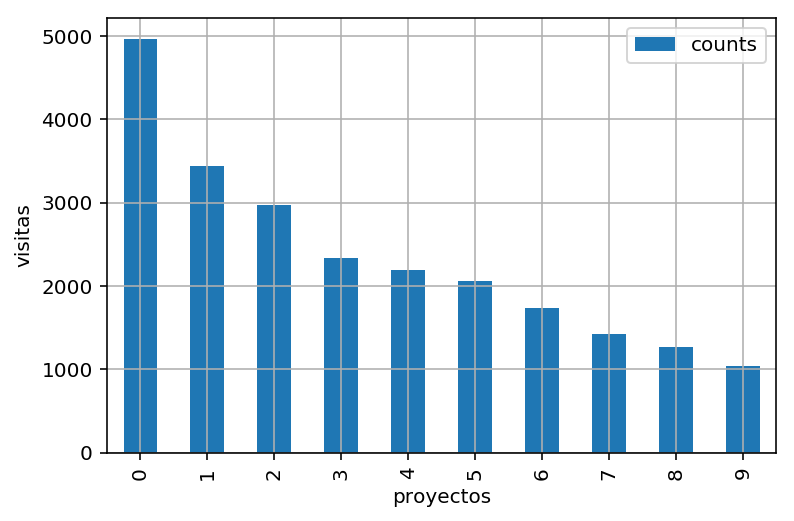

In [420]:
ax = df00.plot(kind='bar',grid=True)
plt.xlabel('proyectos')
plt.ylabel('visitas')
plt.show();

### Pregunta 2

Agregar la posibilidad de filtrar por país del visitante.


* procedemos de la misma manera que la pregunta anterior, pero esta vez incluimos el pais de los visitantes para poder filtrar por ese campo.

In [363]:
df1 = df_visits
df1 = df1.drop('query_string', 1)

In [364]:
df1

,page_path,visit_country
0,/13093/body-house-monolab,NaN
1,/13093/body-house-monolab,NaN
2,/17962/turtagro-hotel-jva,NaN
3,/1929/mortensrud-church-jsa,NaN
4,/1929/mortensrud-church-jsa,NaN
5,/1929/mortensrud-church-jsa,NaN
6,/1929/mortensrud-church-jsa,NaN
7,/1929/mortensrud-church-jsa,NaN
8,/1929/mortensrud-church-jsa,NaN
9,/1929/mortensrud-church-jsa,NaN


* podemos escoger cualquier pais que este contenido, pero en este caso escogeremos US, debido a la gran cantidad de visitas que este posea, para asi poder realizar la agrupación con varios registros y no con tan solo unos pocos.

In [365]:
df1.groupby("visit_country").visit_country.count()

visit_country
AE     318
AF       2
AL     158
AM      58
AO       9
AR     194
AT     288
AU     643
AZ      12
BA      99
BB       2
BD     192
BE     522
BF      13
BG     131
BH      18
BJ       1
BM       1
BN       4
BO      14
BR     692
BS       1
BT       3
BW       7
BY      63
BZ       1
CA    1311
CD       2
CG       1
CH     288
      ... 
SK     105
SL       2
SM       1
SN       4
SR       1
ST       2
SV      20
SY      46
TD       3
TH    1132
TL       3
TN      78
TR    1029
TT       3
TW     695
TZ      32
UA     309
UG      15
US    6710
UY      43
UZ       5
VE      59
VI       1
VN     930
VU       1
XK       1
YE      31
ZA     139
ZM       7
ZW       7
Name: visit_country, Length: 175, dtype: int64

* Seleccionamos solo las visitas de USA

In [366]:
df1_us = df1[df1.visit_country == 'US']

In [367]:
def cut (s):
    x = s[0]
    x = x[1:]
    end = x.find('/')
    return x[:end]

In [368]:
df1_us['page_path'] = df1_us.apply(cut,axis=1)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [369]:
df1_us = df1_us.groupby(["page_path"]).size().reset_index(name='counts')

In [370]:
df1_us = df1_us.sort_values(['counts'], ascending=[False])


In [371]:
df1_us = df1_us.reset_index(inplace=False)

In [372]:
df1_us = df1_us.drop('index', 1)

In [373]:
df1_us.rename(columns={'page_path': 'project'}, inplace=True)

In [421]:
df11 = df1_us.head(10)

In [422]:
df11

,project,counts
0,101260,661
1,118627,615
2,628163,407
3,554132,383
4,91273,299
5,205541,274
6,213084,253
7,882963,206
8,785472,186
9,592824,186


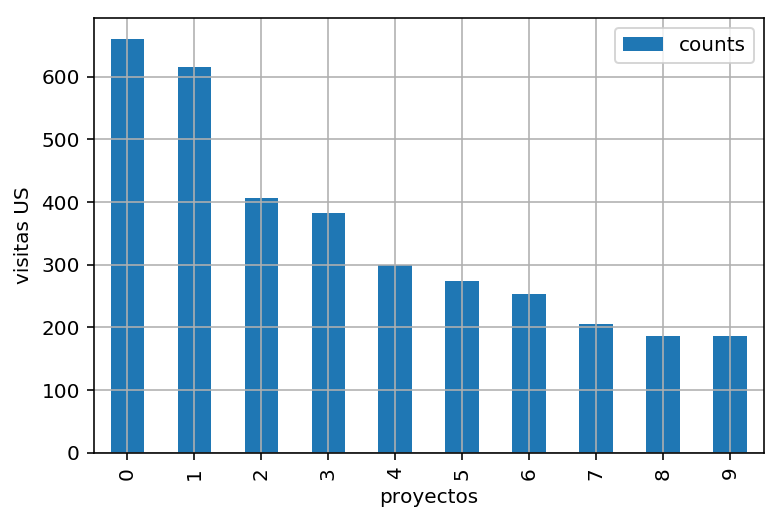

In [424]:
ax = df11.plot(kind='bar',grid=True)
plt.xlabel('proyectos')
plt.ylabel('visitas US')
plt.show();

### pregunta 3

3.- Consulta en SQL, que respondan las preguntas 1. y 2.


* Consulta SQL para pregunta 1

SELECT
  page_path, count(*) 

FROM
  [test_visits]

GROUP BY 1

ORDER BY 2 desc

* Consulta SQL para pregunta 2

SELECT
  page_path, visit_country, count(*) 

FROM
  [test_visits]

WHERE
  visit_country='US'

GROUP BY 1

ORDER BY 3 desc

### Pregunta 4

¿Qué otra información consideras relevante que puedas obtener a partir de estos datos?

Con solo estos datos, otra información relevante que se puede obtener es:

1. En primero lugar, si analizamos el campo query_string, podemos obtener información relevante sobre el usuario. ya que aqui se registra la procedencia de la visita, que puede ser desde el mail, un enlace en facebook o algun link externo al sitio en si. por ejemplo (utm_source=Whatsapp=IM=share-button ó ad_medium=bookmark-recommendation&ad_name=ifra...)

2. Al tener el país en donde estan construidos los proyectos, se puede cruzar con el país de procedencia de las visitas que recibe, para saber si las personas visitan o no los proyectos que se contruyen en su país de procedencia.

3. Se puede saber cuantos proyectos se suben a la plataforma por año, los paises que contienen a la mayor cantidad de proyectos o que paises realizan la mayor cantidad de visitas.


### Anexo 

A continuación se desarrollara brevemente el punto número 1 de la pregunta número 4




* eliminamos los NaN

In [501]:
df_visits2 = df_visits.dropna()

In [502]:
df_visits2

,page_path,query_string,visit_country
1549,/17962/turtagro-hotel-jva,ad_medium=widget&ad_name=recommendation,AE
1550,/17962/turtagro-hotel-jva,ad_medium=widget&ad_name=category-hotels-artic...,AE
1568,/146874/b-house-damilano-studio-architects,ad_medium=mobile-widget&ad_name=category-house...,AE
1569,/146874/b-house-damilano-studio-architects,ad_medium=mobile-widget&ad_name=category-house...,AE
1572,/435254/cardal-house-cannata-and-fernandes,ad_medium=bookmark-recommendation&ad_name=ifra...,AE
1574,/63567/polytechnic-school-inaqui-carnicero,ad_medium=widget&ad_name=more-from-office-arti...,AE
1583,/40802/bras-basah-rapid-transit-station-woha,ad_medium=widget&ad_name=recommendation,AE
1624,/785472/house-in-litoral-alentejano-aires-mateus,ad_medium=widget&ad_name=recommendation,AE
1664,/101260/ad-classics-church-of-the-light-tadao-...,sa=X&ved=0ahUKEwi4q73zt9XYAhXR_aQKHfSlAB4Q_B0I...,AE
1665,/101260/ad-classics-church-of-the-light-tadao-...,sa=X&ved=0ahUKEwi4q73zt9XYAhXR_aQKHfSlAB4Q_B0I...,AE


In [503]:
df_query = df_visits2
df_query = df_query.drop('page_path', 1)
df_query = df_query.drop('visit_country', 1)

In [504]:
df_query['Whatsapp'] = 0
df_query['myarchdaily'] = 0
df_query['email'] = 0

In [505]:
def contain_wha (s):  
    x = s[0]
    x = x.find('Whatsapp')
    if x != -1:
        return 1
    else: 
        return 0

In [506]:
def contain_my (s):  
    x = s[0]
    x = x.find('myarchdaily')
    if x != -1:
        return 1
    else: 
        return 0

In [507]:
def contain_email (s):  
    x = s[0]
    x = x.find('email')
    if x != -1:
        return 1
    else: 
        return 0

In [508]:
df_query['Whatsapp'] = df_query.apply(contain_wha,axis=1)

In [509]:
df_query['myarchdaily'] = df_query.apply(contain_my,axis=1)

In [510]:
df_query['email'] = df_query.apply(contain_email,axis=1)

In [511]:
df_query[df_query.email == 1]

,query_string,Whatsapp,myarchdaily,email
2417,utm_medium=email&utm_source=ArchDaily%20List,0,0,1
2447,utm_medium=email&utm_source=ArchDaily%20List,0,0,1
2843,utm_medium=email&utm_source=ArchDaily%20List,0,0,1
3546,utm_medium=email&utm_source=ArchDaily%20List&k...,0,0,1
4536,utm_source=ArchDaily+List&utm_campaign=c0be007...,0,0,1
5094,utm_medium=email&utm_source=ArchDaily%20List&k...,0,0,1
5248,utm_medium=email&utm_source=ArchDaily%20List,0,0,1
5645,utm_medium=email&utm_source=ArchDaily%20List,0,0,1
5994,utm_medium=email&utm_source=ArchDaily%20List,0,0,1
6502,utm_medium=email&utm_source=ArchDaily%20List,0,0,1


In [512]:
df_query[df_query.Whatsapp == 1]

,query_string,Whatsapp,myarchdaily,email
1696,utm_source=Whatsapp=IM=share-button,1,0,0
1697,utm_source=Whatsapp=IM=share-button,1,0,0
4910,utm_source=Whatsapp=IM=share-button,1,0,0
4911,utm_source=Whatsapp=IM=share-button,1,0,0
4912,utm_source=Whatsapp=IM=share-button,1,0,0
4913,utm_source=Whatsapp=IM=share-button,1,0,0
4914,utm_source=Whatsapp=IM=share-button,1,0,0
4915,utm_source=Whatsapp=IM=share-button,1,0,0
6302,utm_source=Whatsapp=IM=share-button,1,0,0
7764,utm_source=Whatsapp=IM=share-button,1,0,0


In [513]:
df_query[df_query.myarchdaily == 1]

,query_string,Whatsapp,myarchdaily,email
2293,ad_source=myarchdaily&ad_medium=bookmark-show&...,0,1,0
2396,ad_source=myarchdaily&ad_medium=bookmark-show&...,0,1,0
3687,ad_source=myarchdaily&ad_medium=bookmark-show&...,0,1,0
4396,ad_source=myarchdaily&ad_medium=bookmark-show&...,0,1,0
4494,ad_source=myarchdaily&ad_medium=bookmark-show&...,0,1,0
4495,ad_source=myarchdaily&ad_medium=bookmark-show&...,0,1,0
5072,ad_source=myarchdaily&ad_medium=bookmark-show&...,0,1,0
5073,ad_source=myarchdaily&ad_medium=bookmark-show&...,0,1,0
6486,ad_source=myarchdaily&ad_medium=bookmark-show&...,0,1,0
6856,ad_source=myarchdaily&ad_medium=bookmark-show&...,0,1,0


In [534]:
dfq = pd.DataFrame(columns = ['n_reference'])

In [537]:
col = ['Whatsapp','myarchdaily','email']

for c in col:
    a = df_query[c].sum()
    dfq.loc[c] = a

In [538]:
dfq

,n_reference
Whatsapp,64
myarchdaily,156
email,41


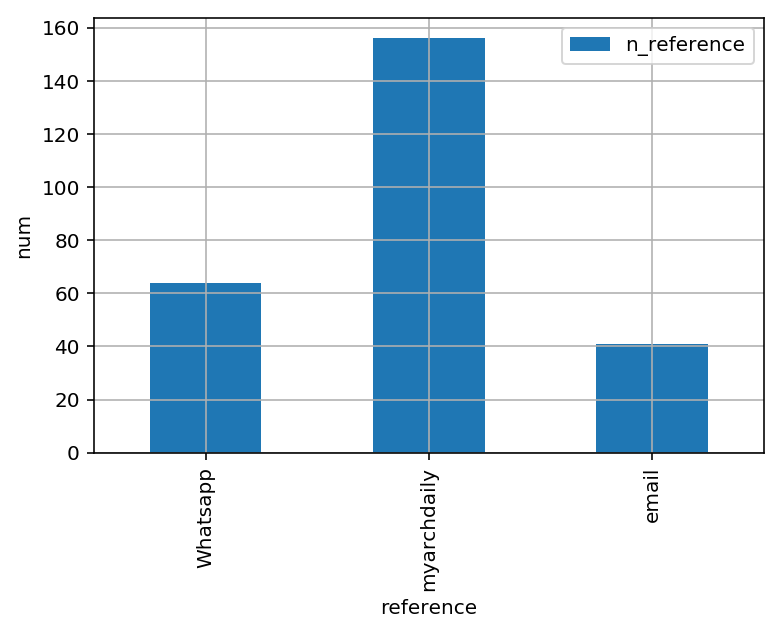

In [540]:
ax = dfq.plot(kind='bar',grid=True)
plt.xlabel('reference')
plt.ylabel('num')
plt.show();

* Ratio de las referencias (para saber exactamente que % de la cantidad de total de referencia es cada una)

In [546]:
dfq2 = pd.DataFrame(columns = ['ratio_reference'])

* al eliminar los NaN al principio del anexo, nos quedan 2281 fisitas que tienen un query_string asociado.

In [547]:
col = ['Whatsapp','myarchdaily','email']

for c in col:
    a = df_query[c].sum() / 2281 * 100
    dfq2.loc[c] = a

In [548]:
dfq2

,ratio_reference
Whatsapp,2.805787
myarchdaily,6.839106
email,1.797457
